# Employee Retention Prediction project

## Introduction

Employee retention is a critical concern for organizations, particularly in the fast-paced and highly competitive field of data science. High turnover rates among skilled professionals can lead to disruptions in project continuity, increased hiring costs, and loss of intellectual capital.
This project aims to develop a machine learning model that predicts whether a data scientist is likely to seek a job change. By leveraging employee attributes such as education, experience, company characteristics, and job preferences, the model can help Human Resources (HR) and management teams proactively identify employees at risk of leaving.
The insights derived from this model will enable: 

Proactive retention strategies
Efficient workforce planning
Optimized resource allocation for upskilling and engagement

By integrating predictive analytics into HR decision-making, organizations can not only reduce attrition rates but also improve employee 
satisfaction and long-term productivity


### THE WORK FLOW OF THE PROJECT IS GIVEN BELOW :

Importing Important Libraries.

Data Overview.

EDA (Exploratory Data Analysis).

Data Preprocessing.

Modeling.

Evaluation.


 ### Project Goal

The goal of this project is to build a robust machine learning model that predicts whether a data scientist 
is likely to look for
a job change.By accurately identifying potential attrition, the model will support:

Improved employee retention strategies
Proactive recruitment planning
Efficient HR resource allocation



### Data Loading

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
data=pd.read_csv('aug_train.csv')       
Test_data=pd.read_csv('aug_test.csv')

In [367]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Data Cleaning 

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [369]:
data.shape

(19158, 14)

In [370]:
data.isna().sum()   #isna().sum() use for detect missing values

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [371]:
(data.isnull().sum()/data.shape[0])*100    

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [372]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [373]:
data['gender'].value_counts()    

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [374]:
data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [375]:
data['relevent_experience'].value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

In [376]:
data.head(50)['gender'].value_counts()       #Top 50 Males, Females and Others Count That's why use data .head

gender
Male      28
Female     5
Other      1
Name: count, dtype: int64

In [377]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [378]:
data['last_new_job'].value_counts()


last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [379]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [380]:
data.drop('company_type',axis=1,inplace=True)     #axis=1 use beacause of remove a column other wise remove row using axis=0 

In [381]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [382]:
data['training_hours'].value_counts()

training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64

In [383]:
avg_train_hour = data['training_hours'].mean()

In [384]:
avg_train_hour

np.float64(65.36689633573442)

In [385]:
data['city_development_index'].value_counts()

city_development_index
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: count, Length: 93, dtype: int64

In [386]:
develop_city = data['city_development_index'].mean()

In [387]:
develop_city

np.float64(0.8288480008351603)

In [388]:
data['city_development_index'] = data['city_development_index'].fillna(develop_city)

In [389]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [390]:
data['training_hours'].value_counts()

training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64

In [391]:
train_time = data['training_hours'].mode()[0]

In [392]:
train_time

np.int64(28)

In [393]:
data['training_hours']=data['training_hours'].fillna(train_time)

In [394]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [395]:
gender_null_remove = data['gender']

In [396]:
data['gender']=data['gender'].fillna(gender_null_remove)

In [397]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [398]:
print(data.shape)

(19158, 13)


In [399]:
data.describe

<bound method NDFrame.describe of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   

In [400]:
data.isna().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

### Replace all Columns

In [401]:
new_data = data.fillna(0)

In [402]:
new_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,0,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0.0
2,11561,city_21,0.624,0,No relevent experience,Full time course,Graduate,STEM,5,0,never,83,0.0
3,33241,city_115,0.789,0,No relevent experience,0,Graduate,Business Degree,<1,0,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0.0


### Replace Specific Columns 

In [403]:
new_data['gender'] = data['gender'].fillna('NOT GENDER INFO AVL')

In [404]:
new_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,0,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0.0
2,11561,city_21,0.624,NOT GENDER INFO AVL,No relevent experience,Full time course,Graduate,STEM,5,0,never,83,0.0
3,33241,city_115,0.789,NOT GENDER INFO AVL,No relevent experience,0,Graduate,Business Degree,<1,0,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0.0


### Drop null values

In [405]:
data.dropna(inplace=True)          

In [406]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [407]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,1,108,0.0


In [408]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,9417.000000,9417.000000,9417.000000,9417.000000
mean,16906.814697,0.844092,65.110120,0.164915
std,9914.920028,0.116086,60.268856,0.371123
min,2.000000,0.448000,1.000000,0.000000
25%,8253.000000,0.794000,23.000000,0.000000
50%,16993.000000,0.910000,47.000000,0.000000
75%,25839.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


# Exploratory Data Analysis (EDA)

### Experience based TrainingHours and Target over Time plot

In [409]:
sns.set(style="whitegrid")

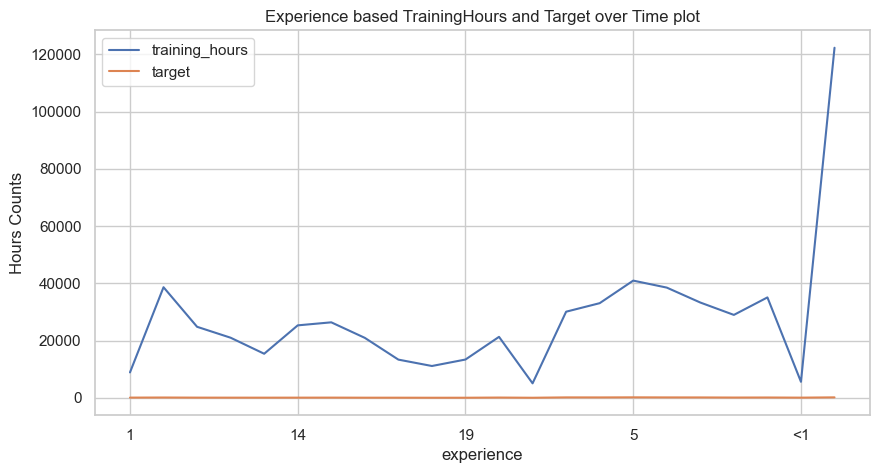

In [410]:
plt.figure(figsize=(10,5))
data.groupby(["experience"])[["training_hours","target"]].sum().plot(ax=plt.gca())
plt.xlabel("experience")
plt.ylabel("Hours Counts")
plt.title("Experience based TrainingHours and Target over Time plot")

plt.show()

In [411]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,9417.000000,9417.000000,9417.000000,9417.000000
mean,16906.814697,0.844092,65.110120,0.164915
std,9914.920028,0.116086,60.268856,0.371123
min,2.000000,0.448000,1.000000,0.000000
25%,8253.000000,0.794000,23.000000,0.000000
50%,16993.000000,0.910000,47.000000,0.000000
75%,25839.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [412]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

### Only  Numerical Data

In [413]:
corr_data = data[['enrollee_id','city_development_index','training_hours','target']]  
corr_data.head()

,enrollee_id,city_development_index,training_hours,target
1,29725,0.776,47,0.0
4,666,0.767,8,0.0
7,402,0.762,18,1.0
8,27107,0.920,46,1.0
11,23853,0.920,108,0.0


### Correlation

In [414]:
corr_data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.037720,0.003236,0.034260
city_development_index,-0.037720,1.000000,-0.003578,-0.422648
training_hours,0.003236,-0.003578,1.000000,-0.008362
target,0.034260,-0.422648,-0.008362,1.000000


In [415]:
corr_data.corr?

Signature:
corr_data.corr(
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. version

### Seaborn Correlation Heatmap

<Axes: >

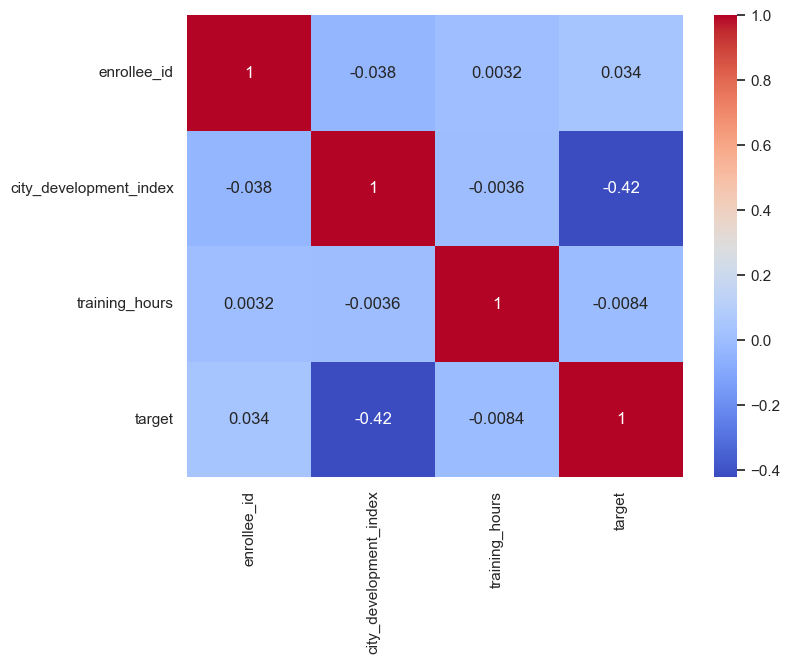

In [416]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')

### Matplotlib Correlation Heatmap



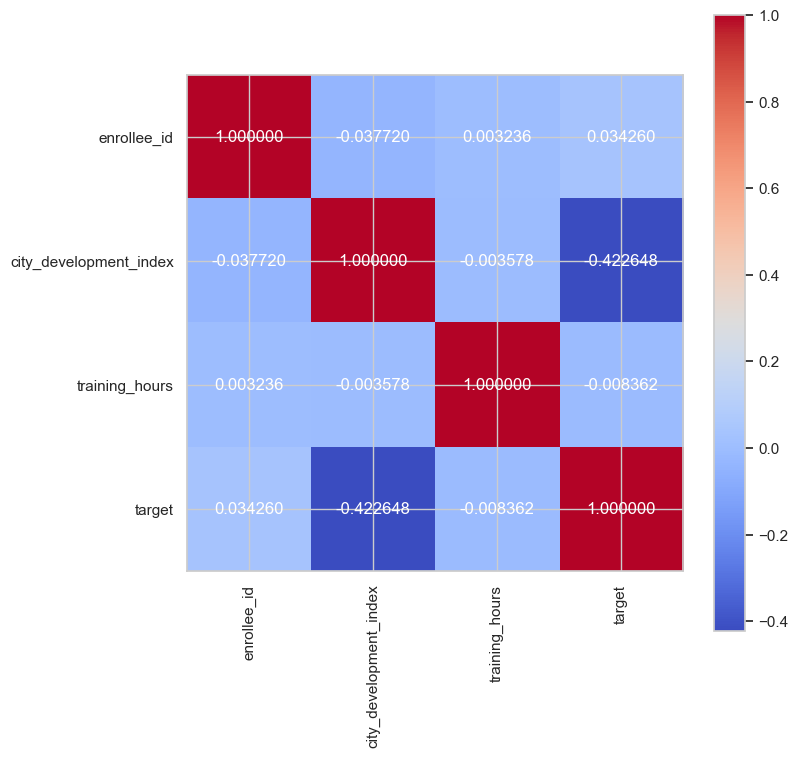

In [417]:
plt.imshow(corr_data.corr(),cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=90)
plt.yticks(range(len(corr_data.columns)), corr_data.columns)
plt.gcf().set_size_inches(8,8)

labels = corr_data.corr().values
for y in range(labels.shape[0]):
    for x in range (labels.shape[1]):
        plt.text(x, y, '{:2f}'.format(labels[y, x]), ha='center', va='center', color='white')

In [418]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,1,108,0.0


### Barplot

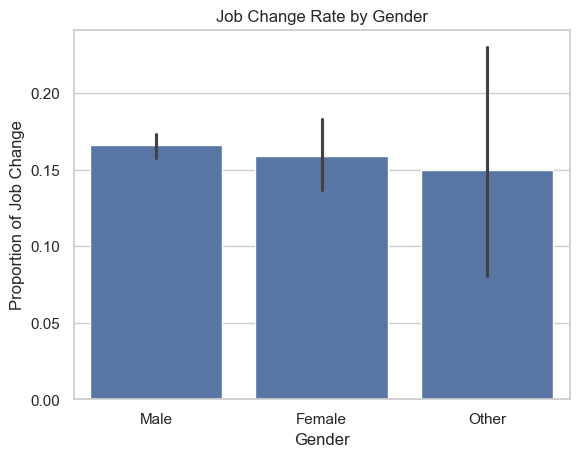

In [419]:
sns.barplot(x='gender', y='target', data=data)
plt.title("Job Change Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion of Job Change")
plt.show()


<Axes: xlabel='gender', ylabel='target'>

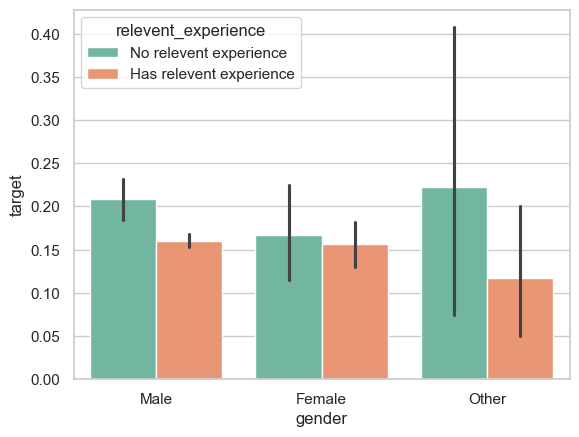

In [420]:
sns.barplot(x='gender', y='target', hue='relevent_experience', data=data, palette='Set2')


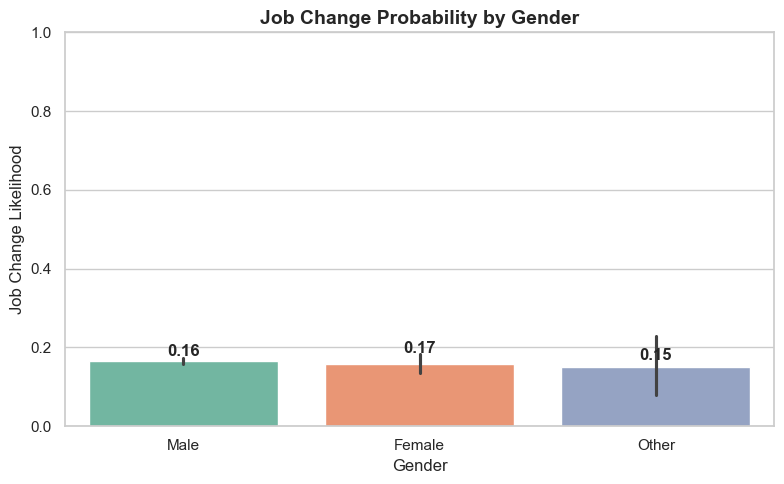

In [422]:
sns.set(style="whitegrid")  # other options: "darkgrid", "ticks", "white", etc.

# Create the barplot
plt.figure(figsize=(8, 5))  # adjust figure size
sns.barplot(x='gender', y='target', data=data, palette='Set2')  # try 'pastel', 'Set1', 'coolwarm'

# Add title and labels
plt.title("Job Change Probability by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Job Change Likelihood", fontsize=12)

# Show percentages on top of bars
for i, val in enumerate(data.groupby('gender')['target'].mean()):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

plt.ylim(0, 1)  # set y-limit for clarity
plt.tight_layout()
plt.show()

## Count Plot

<Axes: xlabel='gender', ylabel='count'>

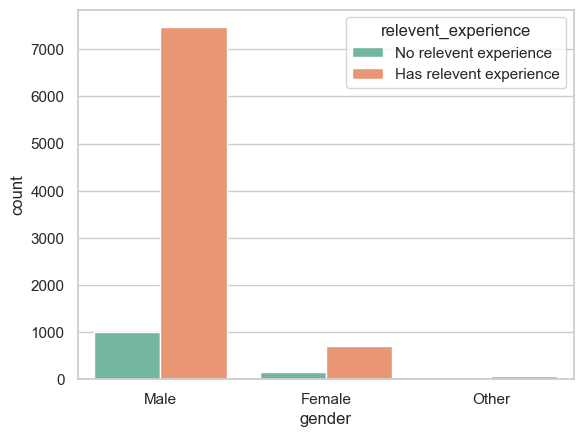

In [423]:
sns.countplot(x='gender', hue='relevent_experience', data=data, palette='Set2')


### Count plot

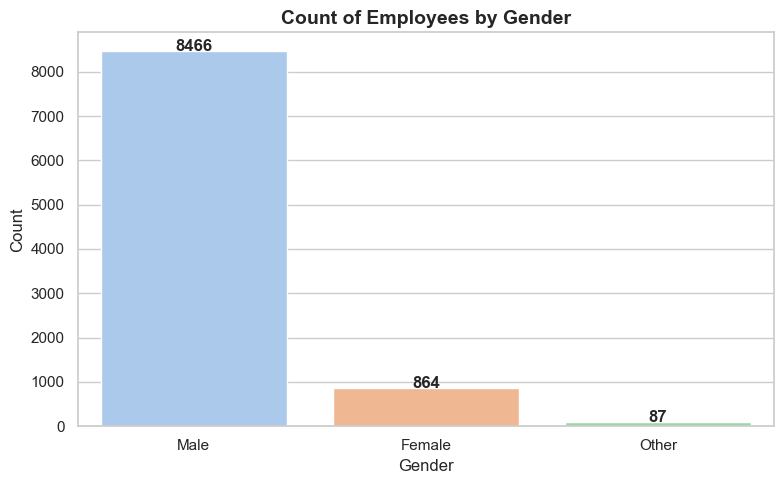

In [424]:
# Set Seaborn style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(8, 5))

# Create the countplot
sns.countplot(x='gender', data=data, palette='pastel')

# Add labels and title
plt.title("Count of Employees by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show values on top of bars
gender_counts = data['gender'].value_counts()
for i, val in enumerate(gender_counts):
    plt.text(i, val + 5, str(val), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

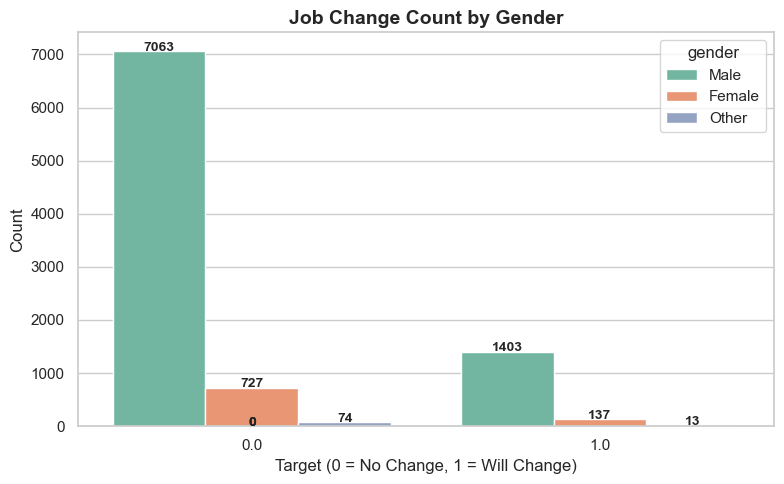

In [425]:


# Set Seaborn style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(8, 5))

# Create the countplot
sns.countplot(x='target', hue='gender', data=data, palette='Set2')

# Add labels and title
plt.title("Job Change Count by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Target (0 = No Change, 1 = Will Change)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add value annotations on bars
# We loop through bars and put the height as text
for p in plt.gca().patches:
    height = int(p.get_height())
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 5), 
                       ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


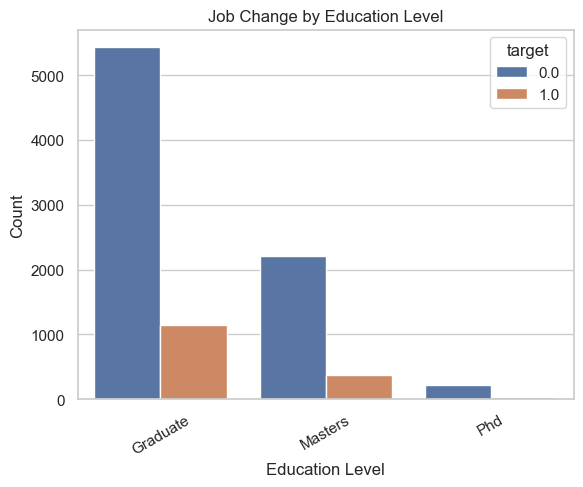

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='education_level', hue='target', data=data)

plt.title("Job Change by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Rotate x labels for clarity
plt.show()


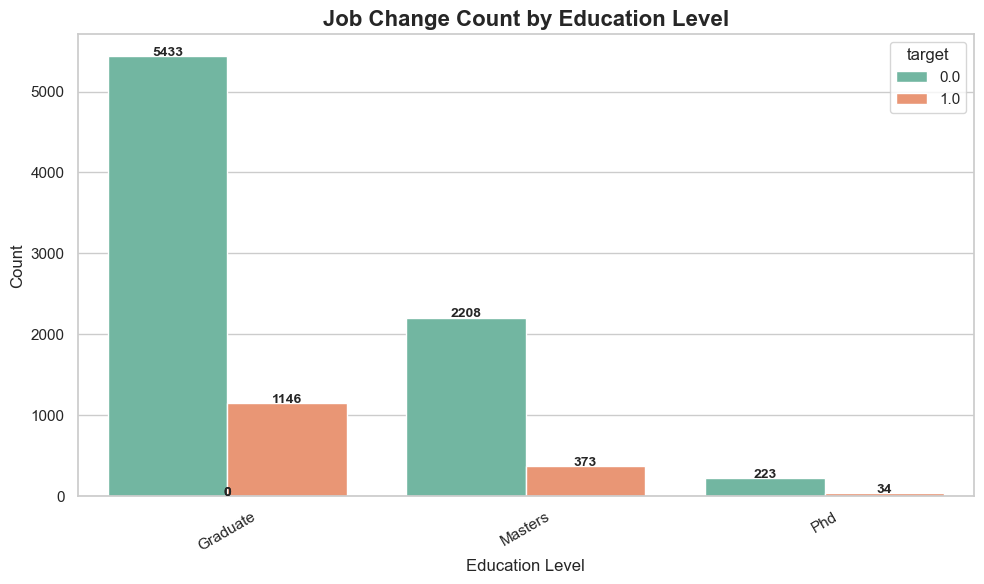

In [427]:

# Set plot style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Create countplot
sns.countplot(x='education_level', hue='target', data=data, palette='Set2')

# Add title and labels
plt.title("Job Change Count by Education Level", fontsize=16, fontweight='bold')
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)  # Rotate x labels for better readability

# Annotate values on top of bars
for p in plt.gca().patches:
    height = int(p.get_height())
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2, height + 2),
                       ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Box plot

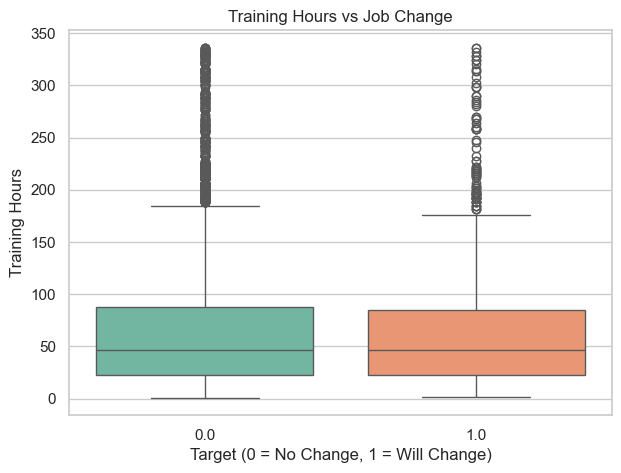

In [428]:


plt.figure(figsize=(7, 5))
sns.boxplot(x='target', y='training_hours', data=data, palette='Set2')

plt.title("Training Hours vs Job Change")
plt.xlabel("Target (0 = No Change, 1 = Will Change)")
plt.ylabel("Training Hours")
plt.show()


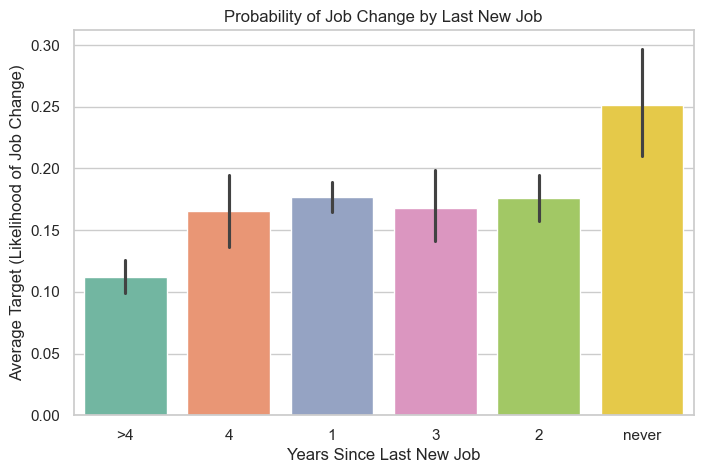

In [429]:


plt.figure(figsize=(8, 5))
sns.barplot(x='last_new_job', y='target', data=data, palette='Set2')

plt.title("Probability of Job Change by Last New Job")
plt.xlabel("Years Since Last New Job")
plt.ylabel("Average Target (Likelihood of Job Change)")
plt.show()


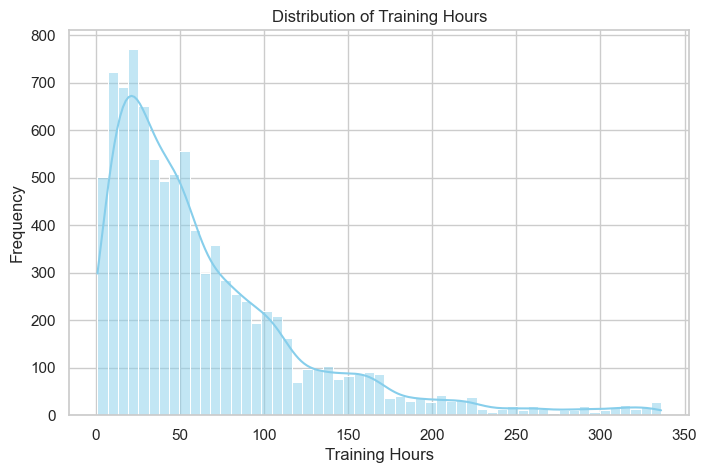

In [430]:

# Example: Distribution of training_hours
plt.figure(figsize=(8, 5))
sns.histplot(data['training_hours'], kde=True, color='skyblue')

plt.title("Distribution of Training Hours")
plt.xlabel("Training Hours")
plt.ylabel("Frequency")
plt.show()


### Find Imbalanced  

In [431]:


# Count the number of 0s and 1s in the target column
print(data['target'].value_counts())


target
0.0    7864
1.0    1553
Name: count, dtype: int64


In [432]:
X = data.drop('target', axis=1)
y = data['target']


### Model Training (Baseline + Advanced Models)

### Logistic Regression Model Train and test

In [433]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [434]:
def training_model(models, X_train, X_test, y_train, y_test):
    for modelparams in models:
        print('***************', modelparams['Name'], '***************')

        model = modelparams['model']
        model.fit(X_train, y_train)

        train_predict = model.predict(X_train)
        print('***************Training Accuracy***************')
        print(accuracy_score(y_train, train_predict))

        test_predict = model.predict(X_test)
        print('***************Testing Accuracy***************')
        print(accuracy_score(y_test, test_predict))

        print('***************Confusion Matrix***************')
        cn_matrix = confusion_matrix(y_test, test_predict)
        sns.heatmap(cn_matrix, annot=True)
        plt.show()

        print('***************Classification Report***************')
        print(classification_report(y_test, test_predict))
        print('---------------------------------------------------')
        print('===================================================')
        print()


In [435]:
models = [
    {'Name': 'LogisticRegression', 'model': LogisticRegression()},
    {'Name': 'RandomForestClassifier', 'model': RandomForestClassifier()},
    {'Name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier()}]




*************** LogisticRegression ***************
***************Training Accuracy***************
0.855170582769149
***************Testing Accuracy***************
0.8683651804670913
***************Confusion Matrix***************


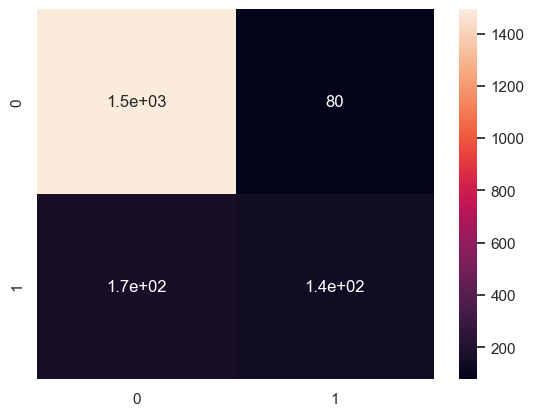

***************Classification Report***************
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1573
         1.0       0.64      0.46      0.54       311

    accuracy                           0.87      1884
   macro avg       0.77      0.70      0.73      1884
weighted avg       0.86      0.87      0.86      1884

---------------------------------------------------

*************** RandomForestClassifier ***************
***************Training Accuracy***************
1.0
***************Testing Accuracy***************
0.8598726114649682
***************Confusion Matrix***************


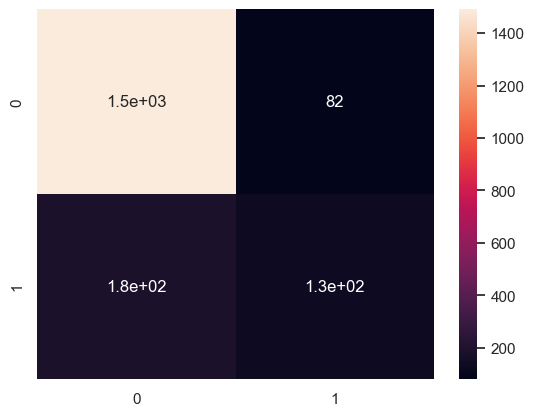

***************Classification Report***************
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1573
         1.0       0.61      0.41      0.49       311

    accuracy                           0.86      1884
   macro avg       0.75      0.68      0.71      1884
weighted avg       0.85      0.86      0.85      1884

---------------------------------------------------

*************** DecisionTreeClassifier ***************
***************Training Accuracy***************
1.0
***************Testing Accuracy***************
0.7871549893842887
***************Confusion Matrix***************


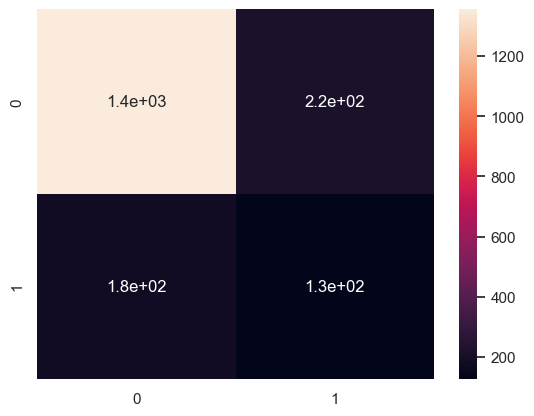

***************Classification Report***************
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1573
         1.0       0.37      0.41      0.39       311

    accuracy                           0.79      1884
   macro avg       0.62      0.64      0.63      1884
weighted avg       0.80      0.79      0.79      1884

---------------------------------------------------



In [436]:
training_model(models, X_train, X_test, y_train, y_test)

# Prediction on Test Data

In [462]:
train_data=pd.read_csv('aug_train.csv') 
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [439]:
test_data=pd.read_csv('aug_test.csv')
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [440]:
# store the lengths
train_data_len = len(train_data)
test_data_len = len(test_data)


In [441]:
#concatenate both dataframes
new_data = pd.concat([train_data,test_data], axis=0)
new_data.reset_index(drop=True, inplace=True)
new_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [442]:
new_data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
21282,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN
21283,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN
21284,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN
21285,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN
21286,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN


In [443]:
print(len(train_data), len(test_data), len(new_data))

19158 2129 21287


In [444]:
new_data.isna().sum() 

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [445]:
sns.set(style="whitegrid")

In [446]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [447]:
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [448]:
# One-hot encode test dataset
test_data_encoded = pd.get_dummies(test_data, drop_first=True)


In [449]:
# Align test dataset with training features
# Fill missing columns with 0 to match training set
X_test_final = X.columns  # From your training set

# Align columns
_, test_data_aligned = X.align(test_data_encoded, join='left', axis=1, fill_value=0)


In [ ]:
# Predict job change (0 = No, 1 = Yes)
test_predictions = model.predict(test_data_scaled)

# If you want probabilities:
test_probabilities = model.predict_proba(test_data_scaled)[:, 1]


In [ ]:
# Add predictions to the original test dataframe
test_data['predicted_target'] = test_predictions
test_data['change_probability'] = test_probabilities


In [460]:
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


Accuracy: 0.5961


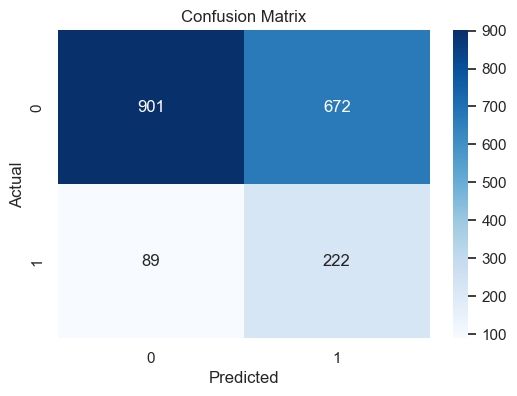

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70      1573
         1.0       0.25      0.71      0.37       311

    accuracy                           0.60      1884
   macro avg       0.58      0.64      0.54      1884
weighted avg       0.80      0.60      0.65      1884

ROC-AUC Score: 0.6381


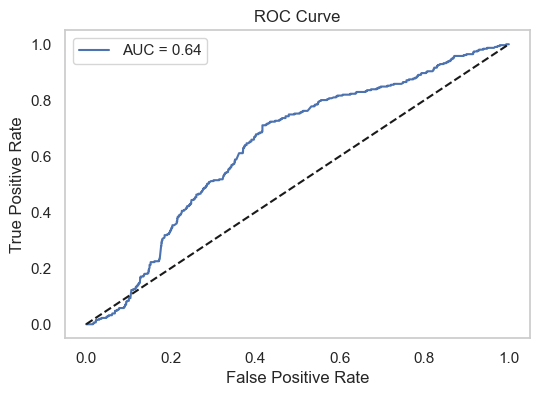

In [461]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Predict on the test set
y_pred = model.predict(X_test_scaled)

# 🔹 Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔹 Classification Report (Precision, Recall, F1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 🔹 ROC-AUC Score (only if binary classification)
if len(set(y_test)) == 2:
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probability for class 1
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()


## Train data and Test data Split


In [453]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [454]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [455]:
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [457]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [458]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [459]:
print(data['target'].value_counts())

target
0.0    7864
1.0    1553
Name: count, dtype: int64
